## Pre-Processing in R

In the following video, we ask you to install the "tm" package to perform the pre-processing steps. Due to function changes that occurred after this video was recorded, you will need to run the following command immediately after converting all of the words to lowercase letters (it converts all documents in the corpus to the PlainTextDocument type):

corpus = tm_map(corpus, PlainTextDocument)

LANGUAGE SETTINGS

If you downloaded and installed R in a location other than the United States, you might encounter some issues when using the bag of words approach (since the pre-processing tasks used here depend on the English language). To fix this, you will need to type in your R console:

Sys.setlocale("LC_ALL", "C")

This will only change the locale for your current R session, so please make a note to run this command when you are working on any lectures or exercises that might depend on the English lanugage (for example, removing stop words).

In [1]:
# install.packages("tm")
# install.packages("SnowballC")
library(tm)
library(SnowballC)

Loading required package: NLP


In [2]:
tweets = read.csv('data/tweets.csv', stringsAsFactors=FALSE)

In [3]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [4]:
tweets$Negative = as.factor(tweets$Avg <= -1)

In [5]:
table(tweets$Negative)


FALSE  TRUE 
  999   182 

## Step 1 - start using the package tm and SnowballC

In [6]:
corpus = Corpus(VectorSource(tweets$Tweet))

In [7]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [8]:
corpus[[1]]$meta

  author       : character(0)
  datetimestamp: 2016-05-23 20:27:17
  description  : character(0)
  heading      : character(0)
  id           : 1
  language     : en
  origin       : character(0)

In [9]:
corpus[[1]]$content

[1] "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore"

### To lower case with `tm_map` and `tolower`:

In [10]:
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)

In [11]:
corpus[[1]]$content

[1] "i have to say, apple has by far the best customer care service i have ever received! @apple @appstore"

### Remove Punctuation

In [12]:
corpus = tm_map(corpus, removePunctuation)

In [13]:
corpus[[1]]$content

[1] "i have to say apple has by far the best customer care service i have ever received apple appstore"

In [14]:
stopwords("english")[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

### Remove stop words and Apple

In [15]:
corpus = tm_map(corpus, removeWords, c("apple", stopwords("english")))

In [16]:
corpus[[1]]$content

[1] "   say    far  best customer care service   ever received  appstore"

### Stemming

In [17]:
corpus = tm_map(corpus, stemDocument)

In [18]:
corpus[[1]]$content

[1] "   say    far  best custom care servic   ever receiv  appstor"

## Bag of words:

The tm package provides a function called **`DocumentTermMatrix`** that generates a matrix where the rows correspond to documents, in our case tweets, and the columns correspond to words in those tweets. The values in the matrix are the number of times that word appears in each document.

In [19]:
frequencies = DocumentTermMatrix(corpus)

In [20]:
frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [21]:
inspect(frequencies[1000:1005, 505: 515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 9
Weighting          : term frequency (tf)

              Terms
Docs           cheapen cheaper check cheep cheer cheerio cherylcol chief
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     1       0         0     0
              Terms
Docs           chiiiiqu child children
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0


In [22]:
findFreqTerms(frequencies, lowfreq = 20)

[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"

In [23]:
findFreqTerms(frequencies, lowfreq = 100)

[1] "iphon" "itun"  "new"

### Only a few words showed up more than 20 times. So let's remove some

In [24]:
sparse = removeSparseTerms(frequencies, 0.995)

In [25]:
sparse

<<DocumentTermMatrix (documents: 1181, terms: 309)>>
Non-/sparse entries: 4669/360260
Sparsity           : 99%
Maximal term length: 20
Weighting          : term frequency (tf)

In [26]:
tweetsSparse = as.data.frame(as.matrix(sparse))

Since R struggles with variable names that start with a number,
and we probably have some words here that start with a number,
let's run the make.names function to make sure
all of our words are appropriate variable names.

In [27]:
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

This will just convert our variable names
to make sure they're all appropriate names
before we build our predictive models.
**You should do this each time you've
built a data frame using text analytics.**
Now let's add our dependent variable to this data set.

In [28]:
tweetsSparse$Negative = tweets$Negative

## Train, Test split

In [35]:
library(caTools)
set.seed(123)
split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)
trainSparse = subset(tweetsSparse, split==TRUE)
testSparse = subset(tweetsSparse, split==FALSE)

In [36]:
nrow(trainSparse)

[1] 826

In [37]:
nrow(testSparse)

[1] 355

## Predicting Sentiment

In [38]:
# Tree CART model:
library(rpart)
library(rpart.plot)

In [39]:
tweetCART = rpart(Negative ~., data = trainSparse, method = "class")

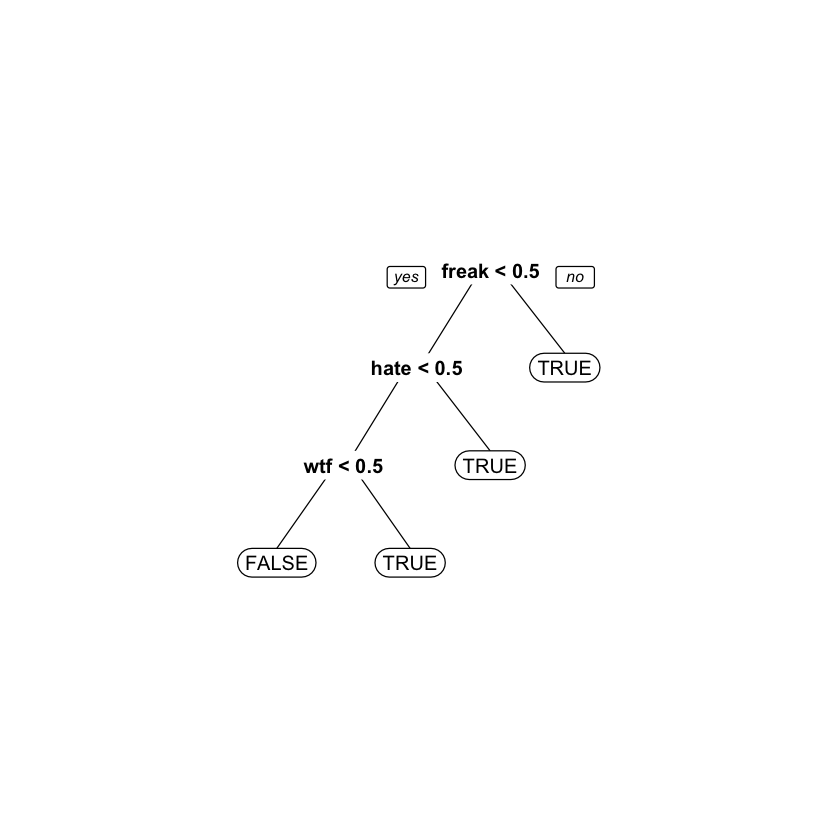

In [40]:
prp(tweetCART)

In [41]:
predictCART = predict(tweetCART, newdata = testSparse, type = "class")

In [42]:
table(testSparse$Negative, predictCART)

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [43]:
t = table(testSparse$Negative, predictCART)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8788732

In [44]:
# ACC baseline:

In [45]:
table(testSparse$Negative)


FALSE  TRUE 
  300    55 

In [46]:
300/355

[1] 0.8450704

Our mode is a bit better. Now try RandomForest



## RandomForest 

In [48]:
library(randomForest)
set.seed(123)

In [49]:
tweetRF = randomForest(Negative ~., data=trainSparse)

In [50]:
predictRF = predict(tweetRF, newdata = testSparse)

In [51]:
table(testSparse$Negative, predictRF)

       predictRF
        FALSE TRUE
  FALSE   293    7
  TRUE     34   21

In [52]:
t = table(testSparse$Negative, predictRF)
# ACC:
sum(diag(t))/sum(t)

[1] 0.884507

## Logistic Regression

In [57]:
tweetLR = glm(Negative ~., data=trainSparse, family = 'binomial')

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [60]:
predictLR = predict(tweetLR, newdata = testSparse, type='response')

Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

In [61]:
table(testSparse$Negative, predictLR > 0.5)

       
        FALSE TRUE
  FALSE   253   47
  TRUE     23   32

In [62]:
t = table(testSparse$Negative, predictLR > 0.5)
# ACC:
sum(diag(t))/sum(t)

[1] 0.8028169